**Importing the libraries required to load,analyse and visualize the data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("test_energy_data.csv")

In [3]:
df

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,24563,15,4,28.52,Weekday,2865.57
1,Commercial,27583,56,23,23.07,Weekend,4283.80
2,Commercial,45313,4,44,33.56,Weekday,5067.83
3,Residential,41625,84,17,27.39,Weekend,4624.30
4,Residential,36720,58,47,17.08,Weekday,4820.59
...,...,...,...,...,...,...,...
95,Commercial,1161,81,11,15.45,Weekend,3010.81
96,Residential,37943,50,23,21.73,Weekend,4248.49
97,Commercial,1558,27,29,16.86,Weekend,2843.60
98,Industrial,2145,56,12,11.77,Weekend,3348.39


Describe the data frame

In [4]:
df.describe()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,25881.920000,47.230000,26.970000,22.043300,4187.57830
std,13711.075264,29.905526,14.237846,6.957951,832.55985
min,1161.000000,2.000000,1.000000,10.400000,2351.97000
25%,14161.000000,21.000000,16.750000,15.682500,3621.92500
50%,27582.500000,47.000000,27.500000,21.970000,4249.39000
75%,38109.500000,73.000000,39.250000,27.492500,4797.17500
max,49354.000000,99.000000,49.000000,34.710000,6042.56000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        100 non-null    object 
 1   Square Footage       100 non-null    int64  
 2   Number of Occupants  100 non-null    int64  
 3   Appliances Used      100 non-null    int64  
 4   Average Temperature  100 non-null    float64
 5   Day of Week          100 non-null    object 
 6   Energy Consumption   100 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 5.6+ KB


In [6]:
#Firstly see that it contain null values or not

df.isna().sum() #it does not contain any null values in it so no need to replace the null values

Building Type          0
Square Footage         0
Number of Occupants    0
Appliances Used        0
Average Temperature    0
Day of Week            0
Energy Consumption     0
dtype: int64

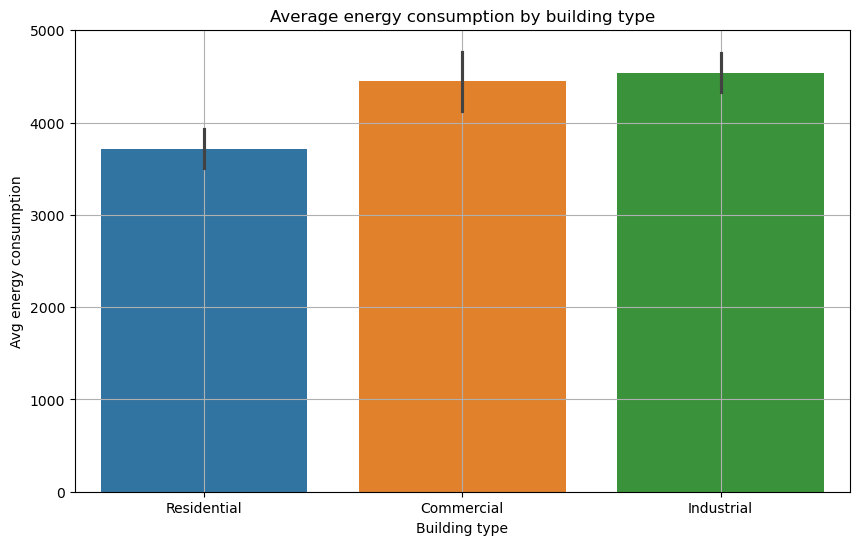

In [7]:
#Average energy consumption by building type

plt.figure(figsize=(10,6))
sns.barplot(data=df,x="Building Type",y="Energy Consumption",estimator="mean",hue="Building Type")
plt.title("Average energy consumption by building type")
plt.xlabel("Building type")
plt.ylabel("Avg energy consumption")
plt.grid()
plt.show()

In [8]:
#What is the average energy consumption for Residential vs Commercial buildings?
avg_egy_cosm=df.groupby("Building Type")["Energy Consumption"].mean()
print(round(avg_egy_cosm,2))

Building Type
Commercial     4446.38
Industrial     4541.19
Residential    3718.79
Name: Energy Consumption, dtype: float64


In [9]:
#Find the minimum, maximum, and average square footage across all buildings.
sqr_footage=df.groupby("Building Type")["Square Footage"]
print(f"For maximum square footage across all building types{sqr_footage.idxmax()}")
print("====================================================================================")
print(f"For manimum square footage across all building types{sqr_footage.idxmin()}")
print("====================================================================================")
print(f"For average square footage across all building types{sqr_footage.mean()}")

For maximum square footage across all building typesBuilding Type
Commercial     32
Industrial     83
Residential    36
Name: Square Footage, dtype: int64
For manimum square footage across all building typesBuilding Type
Commercial     95
Industrial     93
Residential    60
Name: Square Footage, dtype: int64
For average square footage across all building typesBuilding Type
Commercial     29795.846154
Industrial     23542.441176
Residential    25326.425000
Name: Square Footage, dtype: float64


In [10]:
#Which day of the week shows the highest average energy consumption?
high_day_egy_cosm=df.groupby("Day of Week")["Energy Consumption"].mean()
print(f"Highest average energy consumption is on: {high_day_egy_cosm.idxmax()}")

Highest average energy consumption is on: Weekday


In [11]:
#Calculate the average number of appliances used per building type.
avg_no_appl=df.groupby("Building Type")["Appliances Used"].mean()
print(f"The average number of appliances used per building type: {avg_no_appl}")

The average number of appliances used per building type: Building Type
Commercial     28.269231
Industrial     24.205882
Residential    28.475000
Name: Appliances Used, dtype: float64


Correlation values range from -1 to +1.

+1 → Perfect positive correlation (as one increases, the other always increases).

0 → No linear relationship.

-1 → Perfect negative correlation (as one increases, the other always decreases).

In [12]:
#Is there a correlation between square footage and energy consumption?
coor=df["Square Footage"].corr(df["Energy Consumption"])
print(coor)

0.7240391769938658


correlation is:  0.308593630376758


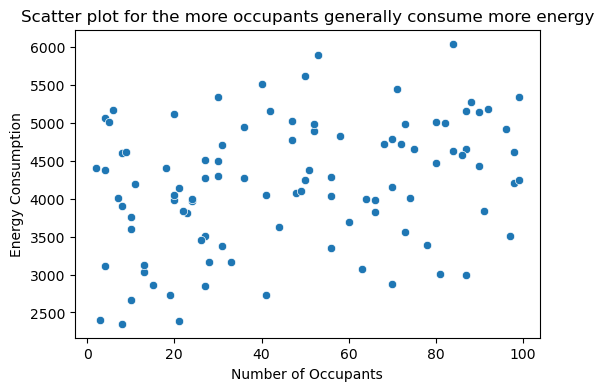

In [13]:
#Do buildings with more occupants generally consume more energy?
cor=df["Number of Occupants"].corr(df["Energy Consumption"])
print("correlation is: ",cor)

plt.figure(figsize=(6,4))
sns.scatterplot(data=df,x="Number of Occupants",y="Energy Consumption")
plt.title("Scatter plot for the more occupants generally consume more energy")
plt.show()

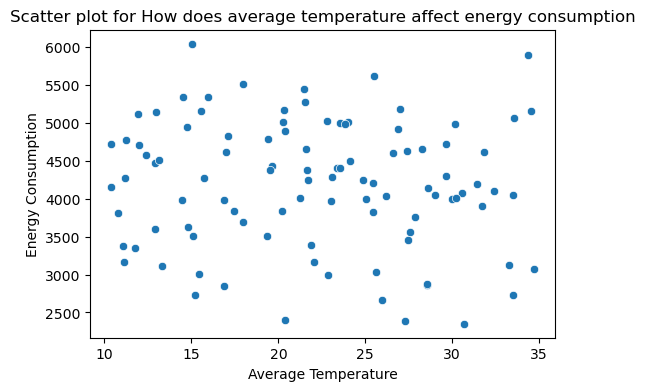

In [14]:
#How does average temperature affect energy consumption?
plt.figure(figsize=(6,4))
sns.scatterplot(data=df,x="Average Temperature",y="Energy Consumption")
plt.title("Scatter plot for How does average temperature affect energy consumption")
plt.show()

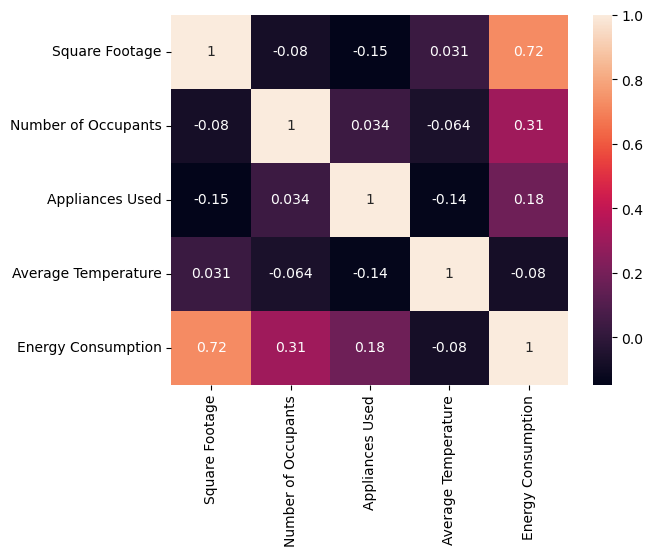

In [15]:
#Which variable (occupants, appliances, square footage) is the strongest predictor of energy consumption?

corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix,annot=True)
plt.show()

In [16]:
#Find outliers in energy consumption using the IQR method.

q1=df["Energy Consumption"].quantile(0.25)
q3=df["Energy Consumption"].quantile(0.75)

IQR=q3-q1

lower_bound=q1-1.5*IQR
upper_bound=q3+1.5*IQR

print("Q1:", q1)
print("Q3:", q3)
print("IQR:", IQR)
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

outliers=df[(df["Energy Consumption"]>lower_bound)|(df["Energy Consumption"]<upper_bound)]

print(outliers.head())
print("Number of outliers: ",outliers.shape[0])

Q1: 3621.925
Q3: 4797.175
IQR: 1175.25
Lower Bound: 1859.0500000000002
Upper Bound: 6560.05
  Building Type  Square Footage  Number of Occupants  Appliances Used  \
0   Residential           24563                   15                4   
1    Commercial           27583                   56               23   
2    Commercial           45313                    4               44   
3   Residential           41625                   84               17   
4   Residential           36720                   58               47   

   Average Temperature Day of Week  Energy Consumption  
0                28.52     Weekday             2865.57  
1                23.07     Weekend             4283.80  
2                33.56     Weekday             5067.83  
3                27.39     Weekend             4624.30  
4                17.08     Weekday             4820.59  
Number of outliers:  100


In data set we have to convert some chategorical columns into numeric columns

Import the sklearn label encoder to convert the data into numeric

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le=LabelEncoder()

In [19]:
df["Building Type"]=le.fit_transform(df["Building Type"])

In [20]:
df["Day of Week"]=le.fit_transform(df["Day of Week"])

In [21]:
df

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,2,24563,15,4,28.52,0,2865.57
1,0,27583,56,23,23.07,1,4283.80
2,0,45313,4,44,33.56,0,5067.83
3,2,41625,84,17,27.39,1,4624.30
4,2,36720,58,47,17.08,0,4820.59
...,...,...,...,...,...,...,...
95,0,1161,81,11,15.45,1,3010.81
96,2,37943,50,23,21.73,1,4248.49
97,0,1558,27,29,16.86,1,2843.60
98,1,2145,56,12,11.77,1,3348.39


Importing the libraries that are required to perform the linear regression algorithm

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

Spliting the data columns into 2 different parts as inputs and outputs

In [23]:
df.columns

Index(['Building Type', 'Square Footage', 'Number of Occupants',
       'Appliances Used', 'Average Temperature', 'Day of Week',
       'Energy Consumption'],
      dtype='object')

In [24]:
#For inputs
x=df[['Building Type', 'Square Footage', 'Number of Occupants',
       'Appliances Used', 'Average Temperature', 'Day of Week']]

#For output
y=df['Energy Consumption']

defining the training and testing variable for both x and y

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

Model calling

In [26]:
model=LinearRegression()

Model training

In [27]:
model.fit(x_train,y_train)

LinearRegression()

model testing

In [28]:
y_pred=model.predict(x_test)

Calculating mean_squared_error and r2_score for the predicted model

This calculates the average squared difference between the actual values (y_test) and the predicted values (y_pred).

MSE=n1​i=1∑n​(yi​−y^​i​)2

In [29]:
#for mean_squared_error
print(mean_squared_error(y_test,y_pred))

133342.59775188714


In [30]:
print(df["Energy Consumption"].sum())

418757.83


For r2_score

This is the coefficient of determination (R²).

It tells you how much of the variance in the target variable is explained by your model.

Formula (conceptual):

R2=1−SStot​SSre

Range:

1 → perfect predictions

0 → model does no better than predicting the mean

< 0 → model is worse than the mean

In [31]:
print(r2_score(y_test,y_pred)) #So the r2_score is closser to the 1, we can say that the model prediction is perfect

0.7086460647171522


Model dumping and loading

In [32]:
import joblib

#for dumping the model

joblib.dump(model,"model.pkl")

['model.pkl']

In [33]:
#for loading the model
joblib.load("model.pkl")

LinearRegression()

In [34]:
print(model.predict([[2,24563,15,4,28.52,0]]))

[3137.25345362]


C:\Users\Varun\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
